<a href="https://colab.research.google.com/github/KIMMOOKYONG/COLAB-NOTENOOK/blob/main/%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0_%EB%B0%8F_%EC%A7%80%EC%88%98%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차
- 필요 모듈 설치
    - 야후 파이낸스 모듈 설치

- 주가 데이터 다운로드
    - AAPL 주가 데이터 다운로드

- 주가 데이터 전처리

    - 이동평균계산

### 필요 모듈 설치

In [ ]:
# 주가 데이터 다운로드 모듈
!pip install yfinance

### 이동평균계산

In [3]:
# 파라미터
# Data: 데이터, 넘파이 배열, lookback: 이동 평균 기간, what: 대상 데이터 위치, where: 저장할 위치
# ma: moving average
def ma(Data, lookback, what, where):
	for i in range(len(Data)):
		try:
			Data[i, where] = (Data[i - lookback + 1:i + 1, what].mean())
		except IndexError:
			pass
	return Data

# 사용 예시
# ma(대상 데이터, 이동평균 기간, 소스 칼럼, 타겟 칼럼)
# ma(ma_data, 100, CLOSE, MEAN)   

In [4]:
import yfinance as yf
import pandas as pd
import warnings

In [5]:
data = yf.download("AAPL", start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785927,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483604,132079200


In [7]:
data["mean"] = 0.

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,mean
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785927,135480400,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483604,132079200,0.0


In [10]:
ma_data = data.values
ma_data

array([[7.40599976e+01, 7.51500015e+01, 7.37975006e+01, ...,
        7.37859268e+01, 1.35480400e+08, 0.00000000e+00],
       [7.42874985e+01, 7.51449966e+01, 7.41250000e+01, ...,
        7.30685730e+01, 1.46322800e+08, 0.00000000e+00],
       [7.34475021e+01, 7.49899979e+01, 7.31875000e+01, ...,
        7.36508026e+01, 1.18387200e+08, 0.00000000e+00],
       ...,
       [1.33419998e+02, 1.37059998e+02, 1.33320007e+02, ...,
        1.35869995e+02, 8.10005000e+07, 0.00000000e+00],
       [1.34789993e+02, 1.37759995e+02, 1.33910004e+02, ...,
        1.35350006e+02, 7.34092000e+07, 0.00000000e+00],
       [1.36820007e+02, 1.38589996e+02, 1.35630005e+02, ...,
        1.38270004e+02, 7.23303000e+07, 0.00000000e+00]])

In [12]:
OPEN = 0
HIGH = 1
LOW = 2
CLOSE = 3
ADJ_CLOSE = 4
VOLUM = 5
MEAN = 6

In [13]:
data.shape, ma_data.shape

((624, 7), (624, 7))

In [14]:
ma_data

array([[7.40599976e+01, 7.51500015e+01, 7.37975006e+01, ...,
        7.37859268e+01, 1.35480400e+08, 0.00000000e+00],
       [7.42874985e+01, 7.51449966e+01, 7.41250000e+01, ...,
        7.30685730e+01, 1.46322800e+08, 0.00000000e+00],
       [7.34475021e+01, 7.49899979e+01, 7.31875000e+01, ...,
        7.36508026e+01, 1.18387200e+08, 0.00000000e+00],
       ...,
       [1.33419998e+02, 1.37059998e+02, 1.33320007e+02, ...,
        1.35869995e+02, 8.10005000e+07, 0.00000000e+00],
       [1.34789993e+02, 1.37759995e+02, 1.33910004e+02, ...,
        1.35350006e+02, 7.34092000e+07, 0.00000000e+00],
       [1.36820007e+02, 1.38589996e+02, 1.35630005e+02, ...,
        1.38270004e+02, 7.23303000e+07, 0.00000000e+00]])

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    ma_result = ma(ma_data, 5, CLOSE, MEAN)

In [16]:
ma_result

array([[7.40599976e+01, 7.51500015e+01, 7.37975006e+01, ...,
        7.37859268e+01, 1.35480400e+08,            nan],
       [7.42874985e+01, 7.51449966e+01, 7.41250000e+01, ...,
        7.30685730e+01, 1.46322800e+08,            nan],
       [7.34475021e+01, 7.49899979e+01, 7.31875000e+01, ...,
        7.36508026e+01, 1.18387200e+08,            nan],
       ...,
       [1.33419998e+02, 1.37059998e+02, 1.33320007e+02, ...,
        1.35869995e+02, 8.10005000e+07, 1.33135995e+02],
       [1.34789993e+02, 1.37759995e+02, 1.33910004e+02, ...,
        1.35350006e+02, 7.34092000e+07, 1.33653998e+02],
       [1.36820007e+02, 1.38589996e+02, 1.35630005e+02, ...,
        1.38270004e+02, 7.23303000e+07, 1.34222000e+02]])

In [18]:
# 0 ~ 4까지의 이동평균
ma_result[4, MEAN]

74.95800018310547

In [19]:
ma_result.shape

(624, 7)

In [ ]:
# 0 ~ 4까지의 이동평균 검증
import numpy as np
np.mean(ma_data[0:5, CLOSE])

74.95800018310547

### 가중 이동평균

In [ ]:
# 가중 이동평균 함수
# 지수 이동평균 함수
def ema(Data, alpha, lookback, what, where):
	# alpha is the smoothing factor
	# window is the lookback period
	# what is the column that needs to have its average calculated
	# where is where to put the exponential moving average

	alpha = alpha / (lookback + 1.0)
	beta  = 1 - alpha

	# First value is a simple SMA
	Data = ma(Data, lookback, what, where)

	# Calculating first EMA
	Data[lookback + 1, where] = (Data[lookback + 1, what] * alpha) + (Data[lookback, where] * beta) # Calculating the rest of EMA
	for i in range(lookback + 2, len(Data)):
			try:
				Data[i, where] = (Data[i, what] * alpha) + (Data[i - 1, where] * beta)
		
			except IndexError:
				pass
	return Data

In [ ]:
ema_data = data.values

In [ ]:
ema_data.shape

(279, 7)

In [20]:
 # 파이썬 경고를 비활성화하는 방법
 with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    ema_data_result = ema(ema_data, 2, 5, CLOSE, MEAN)

NameError: ignored

In [ ]:
# 0 ~ 4까지의 이동평균
ema_data_result[4, MEAN]

74.95800018310547

In [ ]:
ema_data_df = pd.DataFrame(ema_data_result)

In [ ]:
ema_data_df.head()

,0,1,2,3,4,5,6
0,74.059998,75.150002,73.797501,75.087502,74.333511,135480400.0,NaN
1,74.287498,75.144997,74.125000,74.357498,73.610840,146322800.0,NaN
2,73.447502,74.989998,73.187500,74.949997,74.197395,118387200.0,NaN
3,74.959999,75.224998,74.370003,74.597504,73.848442,108872000.0,NaN
4,74.290001,76.110001,74.290001,75.797501,75.036385,132079200.0,74.958


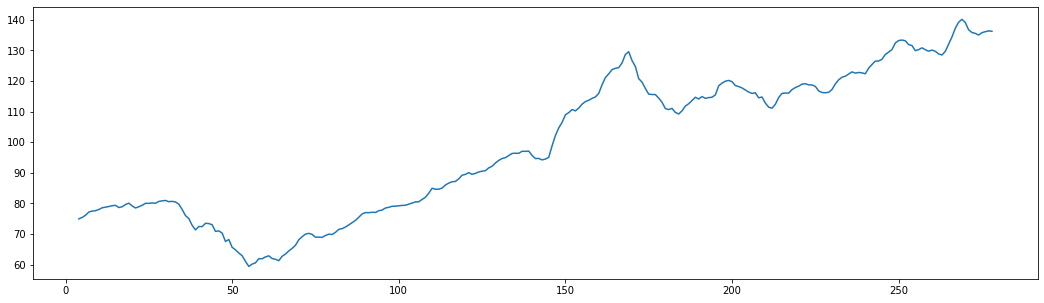

In [ ]:
ema_data_df[6].plot(figsize=(18, 5))

### Q-Stick

#### Qstick Indicator
https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/qstick-indicator/

In [ ]:
def q_stick(Data, ema_lookback, opening, close, where):
	# The variable Data refers to the OHLC array you are using
	# The variable ema_lookback refers to the selected lookback period
	# The variable opening refers to the open column in the OHLC array
	# The variable close refers to the close column in the OHLC array
	# The variable where refers to where the Q-Stick will be put

	for i in range(len(Data)):
		Data[i, where] = Data[i, close] - Data[i, opening]

	Data = ema(Data, 2, ema_lookback, where, where + 1)
	return Data

In [ ]:
data["Q"] = 0.

In [ ]:
data.shape

(279, 8)

In [ ]:
q_stick_data = data.values

In [ ]:
q_stick_data.shape

(279, 8)

In [ ]:
 with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    q_stick_result = q_stick(q_stick_data, 5, OPEN, CLOSE, MEAN)

이동 평균 유형 : 이동 평균 유형에는 단순 이동 평균 (SMA), 지수 이동 평균 (EMA)  평활 이동 평균 (SMMA) 및 선형 가중 이동 평균 (LWMA)이 포함됩니다.

In [ ]:
q_stick_result

array([[ 7.40599976e+01,  7.51500015e+01,  7.37975006e+01, ...,
         1.35480400e+08,  1.02750397e+00,             nan],
       [ 7.42874985e+01,  7.51449966e+01,  7.41250000e+01, ...,
         1.46322800e+08,  6.99996948e-02,             nan],
       [ 7.34475021e+01,  7.49899979e+01,  7.31875000e+01, ...,
         1.18387200e+08,  1.50249481e+00,             nan],
       ...,
       [ 1.37350006e+02,  1.37419998e+02,  1.35860001e+02, ...,
         7.55240000e+07, -5.90011597e-01, -5.11661538e-01],
       [ 1.36029999e+02,  1.36960007e+02,  1.34919998e+02, ...,
         7.12972000e+07,  8.80004883e-01, -4.77727309e-02],
       [ 1.36619995e+02,  1.37880005e+02,  1.35850006e+02, ...,
         7.65328000e+07, -6.10000610e-01, -2.35182024e-01]])

### Back-testing a Simple Strategy

In [ ]:
def signal(Data, what, buy, sell):
	for i in range(len(Data)):
		if Data[i, what] < lower_barrier and Data[i - 1, what] > lower_barrier and Data[i - 2, what] > lower_barrier :
			Data[i, buy] = 1
			
		if Data[i, what] > upper_barrier and Data[i - 1, what] < upper_barrier and Data[i - 2, what] < upper_barrier :
			Data[i, sell] = -1

In [ ]:
signal(Data, what, buy, sell)